In [ ]:
from datasets import load_dataset

ds = load_dataset("Artificio/WikiArt_Full", split='train')

In [85]:
from PIL import Image, ImageDraw
import numpy as np

def generate_irregular_damage(image: Image.Image, max_radius=24, min_radius=8, points=10) -> Image.Image:
    image = image.copy()
    draw = ImageDraw.Draw(image)

    x_center = np.random.randint(max_radius, image.size[0] - max_radius)
    y_center = np.random.randint(max_radius, image.size[1] - max_radius)

    angles = np.linspace(0, 2 * np.pi, points, endpoint=False)
    radii = np.random.randint(min_radius, max_radius, size=points)
    vertices = [
        (
            int(x_center + radius * np.cos(angle)),
            int(y_center + radius * np.sin(angle))
        )
        for angle, radius in zip(angles, radii)
    ]

    vertices.append(vertices[0])

    draw.polygon(vertices, fill=(255, 255, 255))
    
    return image


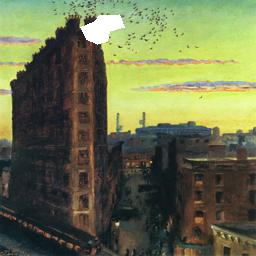

In [89]:
image = ds[0]['image']

generate_irregular_damage(image)